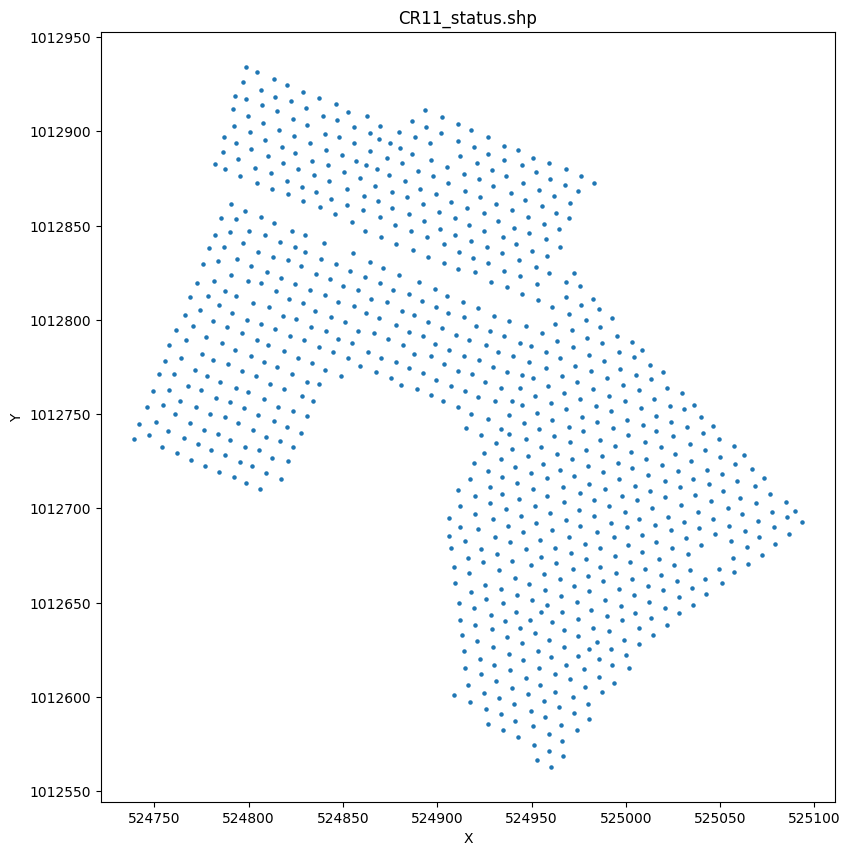

Filename: CR11_status.shp
Reference system: EPSG:32647
Number of points: 856


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

def plot_shapefile(input_file):
    # Step 1: Read file
    gdf = gpd.read_file(shp_file_path)
    crs = gdf.crs
    shp_file_name = os.path.basename(shp_file_path)


    # Step 2: Plot shapefile
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, markersize=5)
    plt.title(shp_file_name)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.ticklabel_format(useOffset=False, style='plain')
    plt.show()

    # Step 3: Print information
    print("Filename:", shp_file_name)
    print("Reference system:", crs)
    print("Number of points:", len(gdf))

shp_file_path = "/root/data/SHP/CR11_status.shp"
plot_shapefile(shp_file_path)


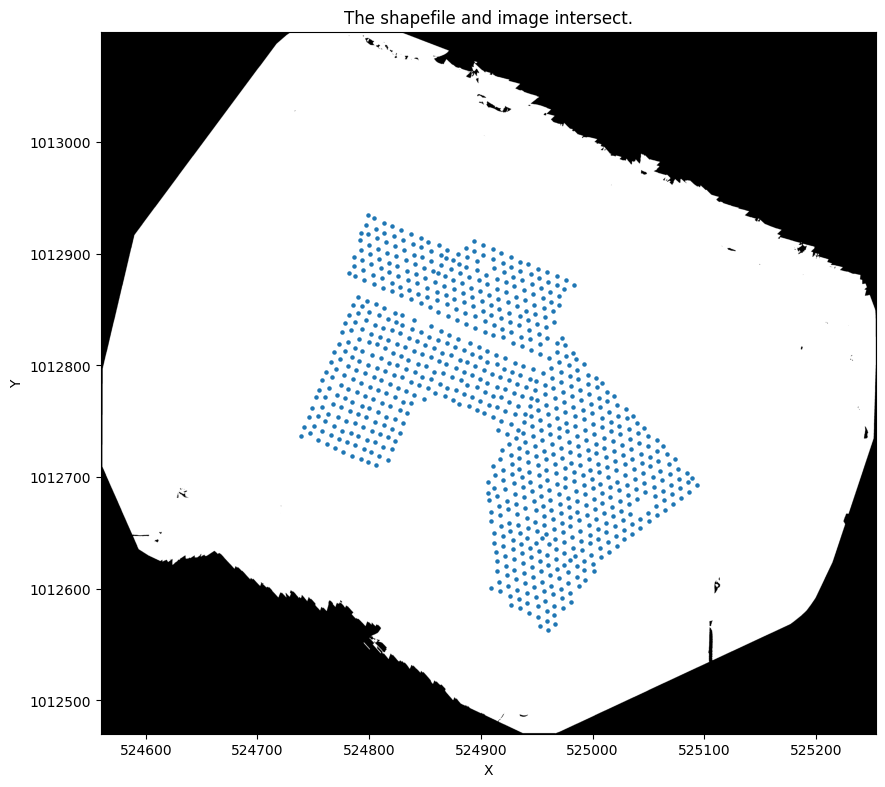

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np


#Read image
NDVI_file_path = "/root/data/NDVI/FIELD_20200716_03_MULT_CR11_090_M04_index_ndvi_register.tiff"
file_name = os.path.basename(NDVI_file_path)

gdf = gpd.read_file(shp_file_path)
with rasterio.open(NDVI_file_path) as src:
    ndvi = src.read(1)
    transform = src.transform

# Check intersection and print status
if gdf.total_bounds[0] > transform[2] + ndvi.shape[1] * transform[0] or \
   gdf.total_bounds[2] < transform[2] or \
   gdf.total_bounds[1] > transform[5] or \
   gdf.total_bounds[3] < transform[5] + ndvi.shape[0] * transform[4]:
    intersect_status = "The shapefile and image do not intersect."
else:
    intersect_status = "The shapefile and image intersect."

# Plot shapefile and image
fig, ax = plt.subplots(figsize=(10, 10))
extent = [gdf.total_bounds[0], gdf.total_bounds[2], gdf.total_bounds[1], gdf.total_bounds[3]]
ax.imshow(ndvi, cmap='gray', extent=[transform[2], transform[2] + ndvi.shape[1] * transform[0],
                                      transform[5] + ndvi.shape[0] * transform[4], transform[5]])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.ticklabel_format(useOffset=False, style='plain')
gdf.plot(ax=ax, markersize=5)
plt.title(intersect_status)
plt.show()

In [9]:
###### Full Buffer
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import os

#Receive input buffer distance
buffer_distance = 5.5  #buffer distance in meters

#Extract NDVI image and save as GeoTIFF
output_folder_full = "/root/data/Extract_Buffer_Full"

gdf = gpd.read_file(shp_file_path)
with rasterio.open(NDVI_file_path) as src:
    transform = src.transform
    meta = src.meta
    ndvi = src.read(1)
    crs = src.crs

for idx, row in gdf.head(5).iterrows():  #Only process first 5 points
    print(idx)
    main_id = row['MainID']
    print(f"Processing point {main_id}...")

    # Create buffer around point
    buffered = row.geometry.buffer(buffer_distance)

    # Mask image with buffer
    out_image, out_transform = mask(dataset=rasterio.open(NDVI_file_path), shapes=[buffered], nodata=-999, crop=True)
    out_image = np.array(out_image, dtype=np.float32)

    # Get output window based on buffer
    out_window = rasterio.windows.from_bounds(*buffered.bounds, transform=out_transform)

    # Update metadata
    meta.update({
        'driver': 'GTiff',
        'height': out_image.shape[1],
        'width': out_image.shape[2],
        'transform': out_transform,
        'nodata': -999,
        'crs': crs
    })

    # Write masked image  to GeoTIFF
    output_file = os.path.join(output_folder_full, f"{main_id}.tiff")
    with rasterio.open(output_file, 'w', **meta) as dst:
        dst.write(out_image, window=out_window)

print("Done.")


0
Processing point CR11-BMP-200...
1
Processing point CR11-BMP-201...
2
Processing point CR11-BMP-202...
3
Processing point CR11-BMP-203...
4
Processing point CR11-BMP-205...
Done.


In [7]:
###### Mid Buffer

import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import os

#Receive input buffer distance
buffer_distance = 3.5  #buffer distance in meters

#Extract NDVI image and save as GeoTIFF
output_folder_mid = "/root/data/Extract_Buffer_Mid"

gdf = gpd.read_file(shp_file_path)
with rasterio.open(NDVI_file_path) as src:
    transform = src.transform
    meta = src.meta
    ndvi = src.read(1)
    crs = src.crs

for idx, row in gdf.head(5).iterrows():  #Only process first 5 points
    main_id = row['MainID']
    print(f"Processing point {main_id}...")

    # Create buffer around point
    buffered = row.geometry.buffer(buffer_distance)

    # Mask image with buffer
    out_image, out_transform = mask(dataset=rasterio.open(NDVI_file_path), shapes=[buffered], nodata=-999, crop=True)
    out_image = np.array(out_image, dtype=np.float32)

    # Get output window based on buffer
    out_window = rasterio.windows.from_bounds(*buffered.bounds, transform=out_transform)

    # Update metadata
    meta.update({
        'driver': 'GTiff',
        'height': out_image.shape[1],
        'width': out_image.shape[2],
        'transform': out_transform,
        'nodata': -999,
        'crs': crs
    })

    # Write masked image  to GeoTIFF
    output_file = os.path.join(output_folder_mid, f"{main_id}.tiff")
    with rasterio.open(output_file, 'w', **meta) as dst:
        dst.write(out_image, window=out_window)

print("Done.")


Processing point CR11-BMP-200...
Processing point CR11-BMP-201...
Processing point CR11-BMP-202...
Processing point CR11-BMP-203...
Processing point CR11-BMP-205...
Done.


In [8]:
###### Full Inner

import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import os

#Receive input buffer distance
buffer_distance = 2  #buffer distance in meters

#Extract NDVI image and save as GeoTIFF
output_folder_inner = "/root/data/Extract_Buffer_Inner"

gdf = gpd.read_file(shp_file_path)
with rasterio.open(NDVI_file_path) as src:
    transform = src.transform
    meta = src.meta
    ndvi = src.read(1)
    crs = src.crs

for idx, row in gdf.head(5).iterrows():  #Only process first 5 points
    main_id = row['MainID']
    print(f"Processing point {main_id}...")

    # Create buffer around point
    buffered = row.geometry.buffer(buffer_distance)

    # Mask image with buffer
    out_image, out_transform = mask(dataset=rasterio.open(NDVI_file_path), shapes=[buffered], nodata=-999, crop=True)
    out_image = np.array(out_image, dtype=np.float32)

    # Get output window based on buffer
    out_window = rasterio.windows.from_bounds(*buffered.bounds, transform=out_transform)

    # Update metadata
    meta.update({
        'driver': 'GTiff',
        'height': out_image.shape[1],
        'width': out_image.shape[2],
        'transform': out_transform,
        'nodata': -999,
        'crs': crs
    })

    # Write masked image  to GeoTIFF
    output_file = os.path.join(output_folder_inner, f"{main_id}.tiff")
    with rasterio.open(output_file, 'w', **meta) as dst:
        dst.write(out_image, window=out_window)

print("Done.")


Processing point CR11-BMP-200...
Processing point CR11-BMP-201...
Processing point CR11-BMP-202...
Processing point CR11-BMP-203...
Processing point CR11-BMP-205...
Done.
